In [1]:
import matplotlib.pyplot as plt
import cv2
cat_img = cv2.imread('./train/dog.39.jpg')
dog_img = cv2.imread('./train/cat.69.jpg')


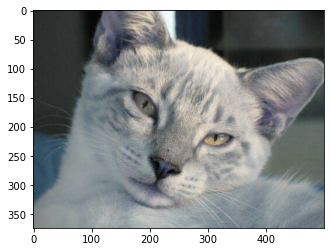

In [2]:
plt.imshow(dog_img)

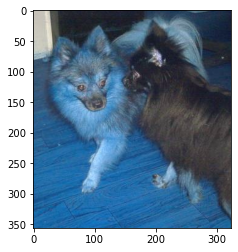

In [3]:
plt.imshow(cat_img)

In [4]:
import pandas as pd
import os

filenames = os.listdir('./train')

categories = []

for filename in filenames:
  category = filename.split('.')[0]

  if category == 'dog':
    categories.append('dog')
  else:
    categories.append('cat')
    
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [5]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df,test_size = 0.2)

In [10]:
#Class for image data generator
from keras.preprocessing.image import ImageDataGenerator

#We need to normalize image
datagen = ImageDataGenerator(rescale=1./255)
traingenerator = datagen.flow_from_dataframe( train_df , './train',x_col = 'filename' , y_col = 'category', target_size = (224,224) ,class_mode='categorical', batch_size = 32)
testgenerator = datagen.flow_from_dataframe( test_df , './train',x_col = 'filename' , y_col = 'category', target_size = (224,224) ,class_mode='categorical', batch_size = 32)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 64)      51264     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 49, 49, 128)       204928    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 20, 20, 256)      

In [14]:
history = model.fit(
    traingenerator, 
    epochs=20,
    validation_data = testgenerator,
    validation_steps= len(testgenerator),
    steps_per_epoch = len(traingenerator)
)

Epoch 1/50
625/625 [==============================] - 43s 69ms/step - loss: 0.6871 - accuracy: 0.5885 - val_loss: 0.6968 - val_accuracy: 0.6068
Epoch 2/50
625/625 [==============================] - 33s 52ms/step - loss: 0.6129 - accuracy: 0.6695 - val_loss: 1.2775 - val_accuracy: 0.5368
Epoch 3/50
625/625 [==============================] - 33s 53ms/step - loss: 0.5242 - accuracy: 0.7397 - val_loss: 0.7992 - val_accuracy: 0.6332
Epoch 4/50
625/625 [==============================] - 33s 53ms/step - loss: 0.4213 - accuracy: 0.8105 - val_loss: 0.5420 - val_accuracy: 0.7532
Epoch 5/50
625/625 [==============================] - 33s 53ms/step - loss: 0.3405 - accuracy: 0.8540 - val_loss: 0.3059 - val_accuracy: 0.8714
Epoch 6/50
625/625 [==============================] - 33s 53ms/step - loss: 0.2725 - accuracy: 0.8865 - val_loss: 0.2522 - val_accuracy: 0.8906
Epoch 7/50
625/625 [==============================] - 33s 53ms/step - loss: 0.2259 - accuracy: 0.9054 - val_loss: 0.2951 - val_accuracy:

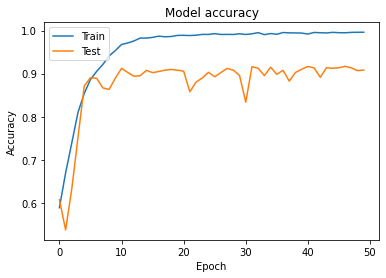

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

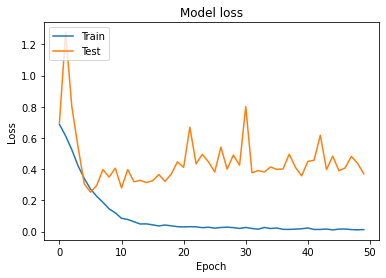

In [16]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [17]:
from keras.models import load_model
model.save('model.h5')  


In [ ]:
model = load_model('model.h5')

In [18]:
# Encoder dictionary created by keras
traingenerator.class_indices

{'cat': 0, 'dog': 1}

In [19]:
labels = (traingenerator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cat', 1: 'dog'}


In [20]:
import numpy as np

def img_show(image):
  b,g,r = cv2.split(image)
  image = cv2.merge((r,g,b))
  plt.imshow(image)
  plt.show()
  return image

def test(model,image_path):
  img = cv2.imread(image_path)
  img = img_show(img)
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,(1,224,224,3))
  img = img/255.0
  prediction = model.predict(img)
  prediction = np.argmax(prediction)
  labels = (traingenerator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  return labels[prediction]

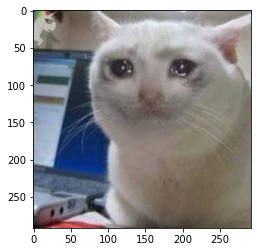

predicted label is: cat


In [21]:
print('predicted label is:' , test(model,'./crying.jpg'))